# Curve Fitting in Python (With Examples)

Often you may want to fit a curve to some dataset in Python.

The following step-by-step example explains how to fit curves to data in Python using the numpy.polyfit() function and how to determine which curve fits the data best.

## Step 1: Create & Visualize Data
First, let’s create a fake dataset and then create a scatterplot to visualize the data:

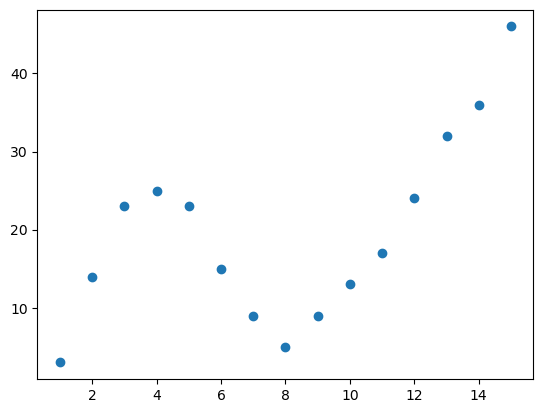

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

#create DataFrame
df = pd.DataFrame({'x': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
                   'y': [3, 14, 23, 25, 23, 15, 9, 5, 9, 13, 17, 24, 32, 36, 46]})

#create scatterplot of x vs. y
plt.scatter(df.x, df.y)

## Step 2: Fit Several Curves
Next, let’s fit several polynomial regression models to the data and visualize the curve of each model in the same plot:

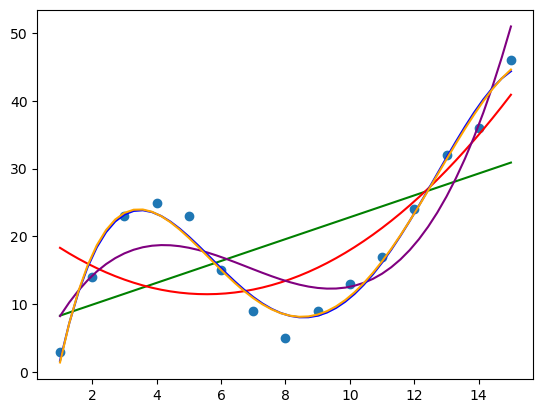

In [2]:
import numpy as np
from numpy.polynomial import Polynomial


#fit polynomial models up to degree 5
model1 = Polynomial.fit(df.x, df.y, 1)
model2 = Polynomial.fit(df.x, df.y, 2)
model3 = Polynomial.fit(df.x, df.y, 3)
model4 = Polynomial.fit(df.x, df.y, 4)
model5 = Polynomial.fit(df.x, df.y, 5)

#create scatterplot
polyline = np.linspace(1, 15, 50)
plt.scatter(df.x, df.y)

#add fitted polynomial lines to scatterplot 
plt.plot(polyline, model1(polyline), color='green')
plt.plot(polyline, model2(polyline), color='red')
plt.plot(polyline, model3(polyline), color='purple')
plt.plot(polyline, model4(polyline), color='blue')
plt.plot(polyline, model5(polyline), color='orange')
plt.show()

To determine which curve best fits the data, we can look at the adjusted R-squared of each model.

This value tells us the percentage of the variation in the response variable that can be explained by the predictor variable(s) in the model, adjusted for the number of predictor variables.

In [3]:
#define function to calculate adjusted r-squared
def adjR(x, y, degree):
    results = {}
    p = Polynomial.fit(x, y, degree)
    yhat = p(x)
    ybar = np.sum(y)/len(y)
    ssreg = np.sum((yhat-ybar)**2)
    sstot = np.sum((y - ybar)**2)
    results['r_squared'] = 1- (((1-(ssreg/sstot))*(len(y)-1))/(len(y)-degree-1))

    return results

#calculated adjusted R-squared of each model
adjR(df.x, df.y, 1)
adjR(df.x, df.y, 2)
adjR(df.x, df.y, 3)
adjR(df.x, df.y, 4)
adjR(df.x, df.y, 5)

{'r_squared': 0.9549708907455999}

From the output we can see that the model with the highest adjusted R-squared is the fourth-degree polynomial, which has an adjusted R-squared of 0.959.

## Step 3: Visualize the Final Curve
Lastly, we can create a scatterplot with the curve of the fourth-degree polynomial model:

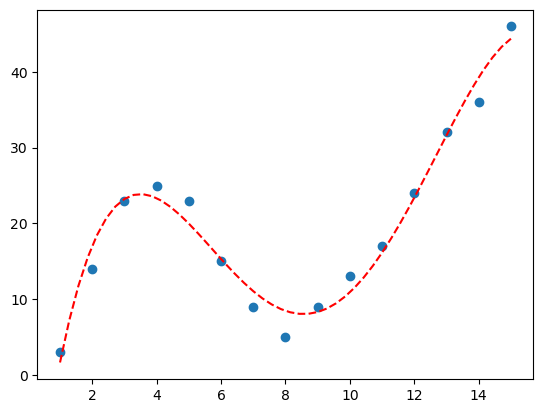

In [4]:
#fit fourth-degree polynomial
model4 = np.poly1d(np.polyfit(df.x, df.y, 4))

#define scatterplot
polyline = np.linspace(1, 15, 50)
plt.scatter(df.x, df.y)

#add fitted polynomial curve to scatterplot
plt.plot(polyline, model4(polyline), '--', color='red')
plt.show()

We can also get the equation for this line using the print() function:

In [5]:
print(model4)

          4          3         2
-0.01924 x + 0.7081 x - 8.365 x + 35.82 x - 26.52


The equation of the curve is as follows:

y = -0.01924x4 + 0.7081x3 – 8.365x2 + 35.82x – 26.52

We can use this equation to predict the value of the response variable based on the predictor variables in the model. For example if x = 4 then we would predict that y = 23.32:

y = -0.0192(4)4 + 0.7081(4)3 – 8.365(4)2 + 35.82(4) – 26.52 = 23.32